In [2]:
!pip install qiskit
!pip install qiskit_algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 4.0 MB/s eta 0:00:00


In [8]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b9f43b6fa377452b2e89cf66b1b1f4166683ffbab04a322232e7ba6fd4860580
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit,transpile,QuantumRegister
from qiskit.circuit import Parameter
from qiskit.primitives import Sampler,Estimator
from tabulate import tabulate
import numpy as np
from qiskit.circuit.library import RealAmplitudes, PauliTwoDesign,EfficientSU2
from qiskit.quantum_info import Pauli
from qiskit_algorithms.optimizers import QNSPSA
from qiskit_algorithms.gradients import DerivativeType, LinCombQGT
from qiskit_algorithms.gradients import QFI


In [3]:
''' Pretty Printing Tensor object in form of a Matrix'''
List=[]
def display(tensor):
 global List
 for i in tensor:
  for j in i:
    for k in i:
      trunc_list=[]
    for l in k:
      x=np.round(l,10)
      trunc_list.append(x)
  List.append(trunc_list)


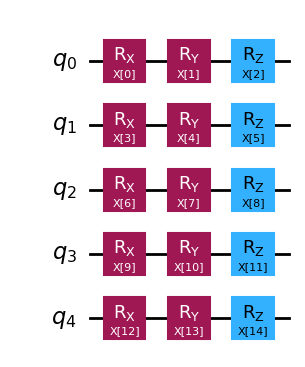

In [4]:
'''
You can define your own parameterized circuit first!
'''
depth=5
qc=QuantumCircuit(depth)
param_list=[Parameter(f"X[{i}]") for i in range (100)]
#Just a long parameter list
count=0
for i in range (depth):
 qc.rx(param_list[count],i)
 count+=1
 qc.ry(param_list[count],i)
 count+=1
 qc.rz(param_list[count],i)
 count+=1
qc.draw(output="mpl",fold=-1)

In [5]:
'''
Find the number of parameters you need to assign for the sample circuit
'''
print("Number of unassigned parameters: ",qc.num_parameters)
#Randomly assign these unknown parameters
param_values=np.random.uniform(-np.pi,np.pi,size=qc.num_parameters)
print("Randomly Assigned Parameters:: \n",param_values) #ndarray

Number of unassigned parameters:  15
Randomly Assigned Parameters:: 
 [-1.81444224 -0.27390179  2.39722297  3.11598949  1.86184961 -0.66076321
  0.64138519 -0.31303105 -2.68514446 -1.77650618 -1.66604715  2.31944871
 -1.10352866  2.7360455   1.29671041]


In [6]:
params=[param_values] #note the nested list, it can be used for finding multiple
estimator=Estimator()
qgt=LinCombQGT(
 estimator,
 derivative_type=DerivativeType.COMPLEX
)
print("Displaying Quantum Geometric Tensor:: ")
qgt_result=qgt.run(qc,params).result().qgts
qgt_result # Complex part included

<ipython-input-6-6abc23d9d993>:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator=Estimator()


Displaying Quantum Geometric Tensor:: 


[array([[ 2.50000000e-01+8.40498308e-19j, -1.96579360e-17-1.81754302e-17j,
          2.97897093e-17-6.10478056e-19j,  1.73472348e-18+2.60208521e-18j,
         -1.99842980e-19+2.45628021e-19j,  1.61171474e-17+2.80027167e-20j,
          2.66576552e-17-6.03106138e-02j, -1.49576480e-01-1.94400555e-01j,
         -4.33680869e-17-2.08166817e-17j,  8.64487680e-18+8.10233462e-18j,
          3.95951973e-17-9.85859503e-18j,  8.67361738e-18+4.33680869e-18j,
         -9.18836285e-18-1.95269063e-17j,  2.70969109e-17+9.90113824e-18j,
         -1.21430643e-17-8.67361738e-19j],
        [-1.96579360e-17+1.81754302e-17j,  1.83151678e-02-5.51685756e-19j,
          6.27127035e-02-1.83031735e-02j, -4.88312653e-17+6.24620503e-18j,
         -5.20417043e-18-3.14138347e-17j, -5.55111512e-17-2.75376752e-19j,
         -1.11022302e-16+1.54644688e-17j,  6.24500451e-17-8.82699549e-18j,
          9.73183998e-18+3.86247024e-18j, -6.93889390e-17-7.95101807e-18j,
         -3.46944695e-17+1.32857777e-17j,  6.78980676e-18

In [7]:
params=[param_values] #note the nested list, it can be used for finding multiple
estimator=Estimator()
qgt=LinCombQGT(
 estimator,
 derivative_type=DerivativeType.REAL
)
print("Displaying Quantum Geometric Tensor:: ")
qgt_result=qgt.run(qc,params).result().qgts
qgt_result # Only Real Part, we will use this for qfi calculation

<ipython-input-7-8f875b74df92>:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator=Estimator()


Displaying Quantum Geometric Tensor:: 


[array([[ 2.50000000e-01, -1.96579360e-17,  2.97897093e-17,
          1.73472348e-18, -1.99842980e-19,  1.61171474e-17,
          2.66576552e-17, -1.49576480e-01, -4.33680869e-17,
          8.64487680e-18,  3.95951973e-17,  8.67361738e-18,
         -9.18836285e-18,  2.70969109e-17, -1.21430643e-17],
        [-1.96579360e-17,  1.83151678e-02,  6.27127035e-02,
         -4.88312653e-17, -5.20417043e-18, -5.55111512e-17,
         -1.11022302e-16,  6.24500451e-17,  9.73183998e-18,
         -6.93889390e-17, -3.46944695e-17,  6.78980676e-18,
          8.32667268e-17,  1.38777878e-17,  1.66997147e-18],
        [ 2.97897093e-17,  6.27127035e-02,  2.33024857e-01,
          1.66132814e-18, -1.30104261e-18,  3.46944695e-17,
          1.38777878e-17, -1.38777878e-17, -1.55728992e-17,
          4.16333634e-17, -4.85722573e-17,  1.16526642e-17,
         -4.85722573e-17, -1.04083409e-17,  6.76224576e-02],
        [ 1.73472348e-18, -4.88312653e-17,  1.66132814e-18,
          2.50000000e-01,  1.75248730

In [8]:
display(qgt_result)
print(tabulate(List,tablefmt="fancy_grid"))

╒════╤═══╤═══════════╤════╤═══╤════╤════╤═══╤════╤═══╤════╤═══╤════╤════╤══════╕
│ -0 │ 0 │ 0.0676225 │ -0 │ 0 │ -0 │ -0 │ 0 │ -0 │ 0 │ -0 │ 0 │ -0 │ -0 │ 0.25 │
╘════╧═══╧═══════════╧════╧═══╧════╧════╧═══╧════╧═══╧════╧═══╧════╧════╧══════╛


In [9]:
List=[]
qfi=QFI(qgt)
qfi_result=qfi.run(qc,params).result().qfis
print("Quantum Fisher Information Matrix:: ")
display(qfi_result)
print(tabulate(List,tablefmt="fancy_grid"))

Quantum Fisher Information Matrix:: 
╒════╤═══╤═════════╤════╤═══╤════╤════╤═══╤════╤═══╤════╤═══╤════╤════╤═══╕
│ -0 │ 0 │ 0.27049 │ -0 │ 0 │ -0 │ -0 │ 0 │ -0 │ 0 │ -0 │ 0 │ -0 │ -0 │ 1 │
╘════╧═══╧═════════╧════╧═══╧════╧════╧═══╧════╧═══╧════╧═══╧════╧════╧═══╛


Let us see the same for an ansatz: RealAmplitude

In [10]:
circ=RealAmplitudes(
 num_qubits=depth,
 reps=2,
 entanglement="pairwise",
)
print("Number of unassigned parameters in the circuit: ",circ.num_parameters)

Number of unassigned parameters in the circuit:  15


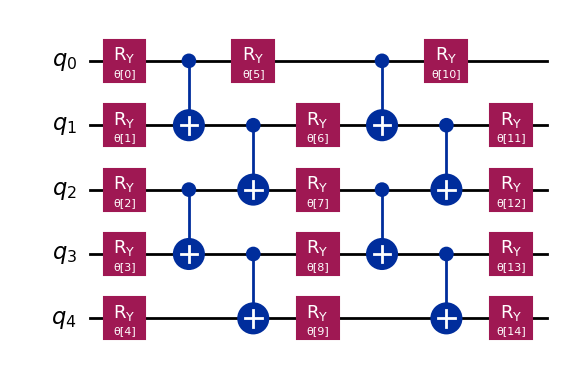

In [11]:
circ.decompose().draw(output="mpl",fold=-1)


In [12]:
ansatz_param_val=np.random.uniform(
 2*-np.pi,2*np.pi,size=circ.num_parameters
)
print("List of randomly generated Parameters: \n",ansatz_param_val)

List of randomly generated Parameters: 
 [-1.14226206  4.76547046  3.7436787  -3.58797732 -0.2701737   1.8356416
  0.45712191  0.63720764  0.95234146  1.2171826   6.06526321  2.29035493
 -1.65102261 -1.3319395   2.0997484 ]


In [13]:
params=[ansatz_param_val] #note the nested list, it can be used for finding mult
estimator=Estimator()
qgt=LinCombQGT(
 estimator,
 derivative_type=DerivativeType.REAL
)
print("Displaying Quantum Geometric Tensor:: ")
qgt_result=qgt.run(qc,params).result().qgts
qgt_result

<ipython-input-13-0c9f012c7ecd>:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator=Estimator()


Displaying Quantum Geometric Tensor:: 


[array([[ 2.50000000e-01, -2.17833712e-17, -1.33697927e-17,
          8.67361738e-18, -9.15622020e-18, -4.32312163e-18,
         -4.15439996e-17, -1.10341838e-01, -1.38777878e-17,
          3.97452981e-17,  3.12955649e-18, -5.26621469e-34,
          1.42699354e-17,  1.28756690e-17, -2.08166817e-17],
        [-2.17833712e-17,  6.36625820e-02, -5.77871447e-03,
         -1.19059907e-17,  1.38777878e-17,  2.77555756e-17,
         -5.55111512e-17, -1.38777878e-17, -2.17281862e-17,
          8.32667268e-17, -4.85722573e-17,  5.99059941e-18,
          5.55111512e-17,  1.90819582e-17, -1.47451495e-17],
        [-1.33697927e-17, -5.77871447e-03,  2.49820790e-01,
          3.42300169e-18,  4.77048956e-18, -1.12757026e-17,
         -1.56125113e-17,  4.33680869e-18,  2.03580347e-17,
          3.29597460e-17,  1.95156391e-18,  7.89716901e-18,
          1.82145965e-17,  2.08708918e-17,  2.49647877e-01],
        [ 8.67361738e-18, -1.19059907e-17,  3.42300169e-18,
          2.50000000e-01,  1.41046770

In [14]:
List=[]
#Insignificantly small numbers are rounded to 0
display(qgt_result)
print(tabulate(List,tablefmt="fancy_grid"))

╒════╤════╤══════════╤════╤═══╤═══╤═══╤════╤════╤═══╤═══╤════╤════╤═══╤══════╕
│ -0 │ -0 │ 0.249648 │ -0 │ 0 │ 0 │ 0 │ -0 │ -0 │ 0 │ 0 │ -0 │ -0 │ 0 │ 0.25 │
╘════╧════╧══════════╧════╧═══╧═══╧═══╧════╧════╧═══╧═══╧════╧════╧═══╧══════╛


In [15]:
'''
I am dynamically defining a function for your versatile usage with any
parameterized quantum circuit.
'''
def get_fisher_matrix(circuit):
 '''
 Expecting the circuit is parameterized and has placeholder parameter list
 embedded inside.
 '''
 param_values=np.random.uniform(-np.pi,np.pi,size=circuit.num_parameters)
 params=[param_values] #note the nested list, it can be used for finding mult
 estimator=Estimator()
 qgt=LinCombQGT(
 estimator,
 derivative_type=DerivativeType.REAL
 )
 print("Calculating Quantum Geometric Tensor....")
 qgt_result=qgt.run(circ,params).result().qgts
 print("QGT calculated successfully! ")
 qfi = QFI(qgt)
 # Evaluate the QFI
 print("Calculating the QFI...")
 qfi_result = qfi.run(circ, params).result().qfis
 print("QFI Calculated successfully!")
 return qfi_result

In [16]:
circ=EfficientSU2(num_qubits=3,entanglement="pairwise")
List=get_fisher_matrix(circ)

<ipython-input-15-ead0a7445d71>:12: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator=Estimator()


Calculating Quantum Geometric Tensor....
QGT calculated successfully! 
Calculating the QFI...
QFI Calculated successfully!


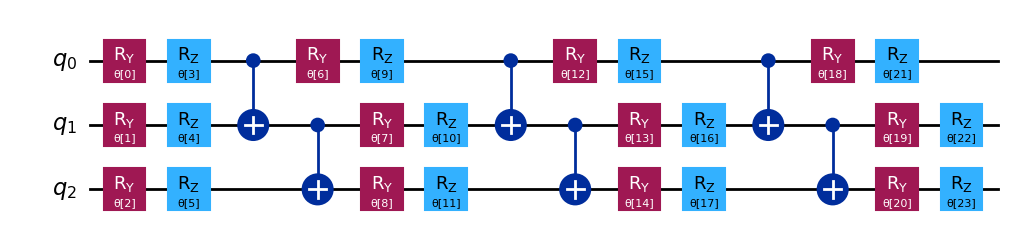

In [17]:
circ.decompose().draw(output="mpl",fold=-1)

In [19]:
for i in List:
 for j in i:
    print(j,end="\n")
 print("\n\n")

[ 1.00000000e+00  1.66533454e-16  4.04445288e-33  6.97672302e-17
 -7.40153271e-18 -1.64696992e-17 -1.08760258e-01 -4.22048429e-17
  5.19950590e-19  1.44129887e-01 -7.01259520e-18 -1.29690280e-16
  1.74738711e-01 -1.33436906e-01 -2.27233373e-01  1.17719309e-01
 -6.51822670e-03 -2.21175220e-01 -1.69471932e-01  1.30173975e-01
  7.35925649e-03 -1.36779050e-01 -3.41035120e-01  9.56891072e-02]
[ 1.66533454e-16  1.00000000e+00  2.22044605e-16 -7.76518519e-17
 -2.96057867e-17  2.98883717e-17 -1.17935943e-01  8.96434085e-02
 -1.68353281e-16 -3.25916141e-02  2.78651262e-01  2.37045593e-17
 -2.43443142e-02  9.42827435e-02  3.55917507e-01 -4.32434608e-02
  9.05660434e-01  3.68628384e-01 -3.99734432e-03 -6.17767490e-02
  2.71222966e-01  3.57271893e-02  6.68309892e-01 -7.72459940e-02]
[ 4.04445288e-33  2.22044605e-16  1.00000000e+00 -7.02716184e-17
 -2.04774362e-16  1.99255811e-17  1.07910449e-16 -1.91860695e-01
  1.72454888e-01  1.16794805e-16  4.54344852e-02 -1.78833488e-01
  7.28987296e-02 -7.568